In [ ]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

## Questão 1

Considere as portas lógicas AND, OR e XOR. Monte a tabela verdade de cada uma e faça a
classificação das mesmas utilizando como modelo a MLP. Para cada caso, determine um critério de
parada e apresente o erro de treinamento em forma de um gráfico do MSE x iteração. Discuta se o
modelo conseguiu alcançar 100 % de acerto e as razões para os resultados. Para cada caso, execute
a rede pelo menos 10 vezes e varie o número de neurônios na camada escondida, mostrando a
melhor configuração alcançada.


In [ ]:
df_and = pd.DataFrame(np.array([[1, 1, 1], [0, 1, 1], [0, 0, 0] , [1, 0, 1]]), columns=['x', 'y', 'target'])
df_or = pd.DataFrame(np.array([[1, 1, 1], [0, 1, 0], [0, 0, 0] , [1, 0, 0]]), columns=['x', 'y', 'target'])
df_xor = pd.DataFrame(np.array([[1, 1, 0], [0, 1, 1], [0, 0, 0] , [1, 0, 1]]), columns=['x', 'y', 'target'])

In [ ]:

def print_mse(lista, n_neuronios, logical, size):
    plt.title(f'{logical} - Neurons: {n_neuronios}')
    plt.plot(lista)
    plt.ylabel('MSE')
    plt.xlabel("Iterations")
    plt.axis([0, size, 0, 1])
    plt.show()

    

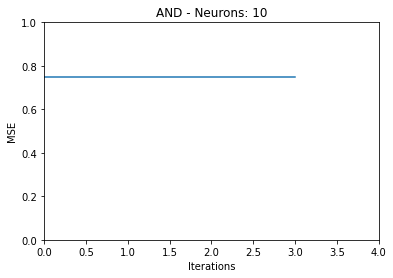

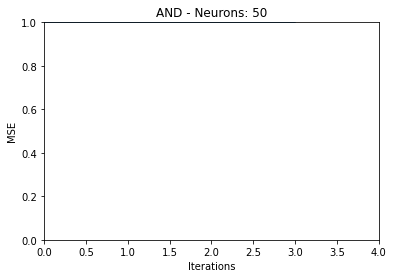

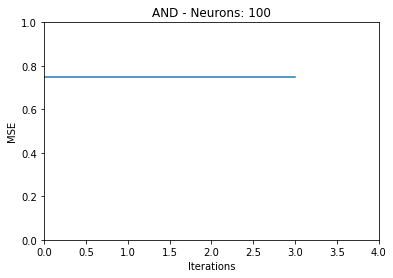

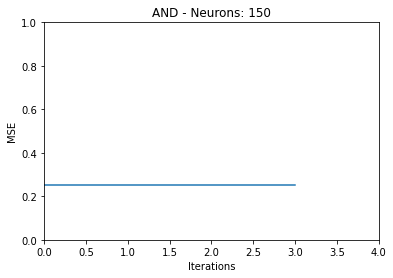

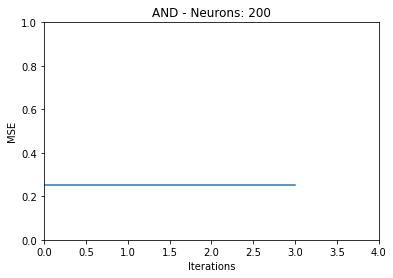

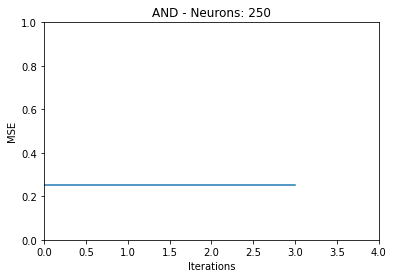

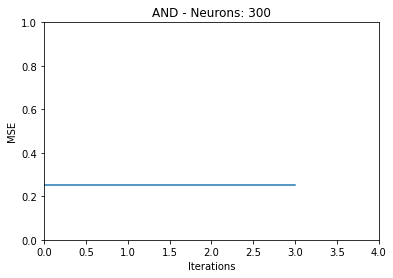

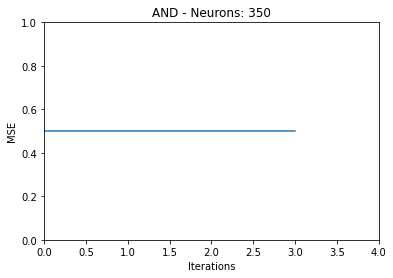

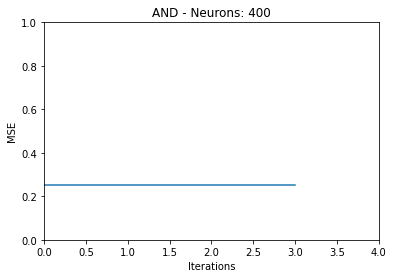

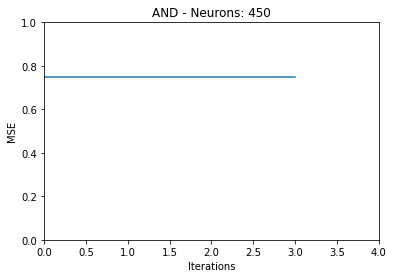

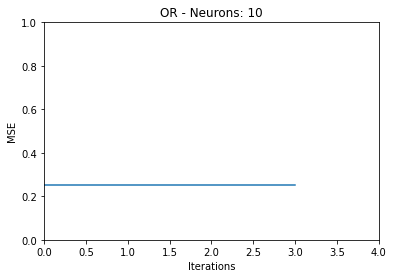

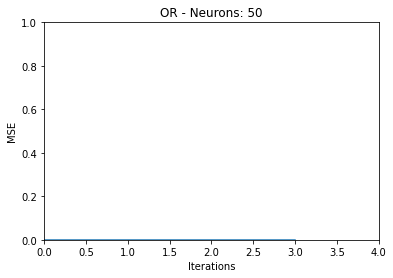

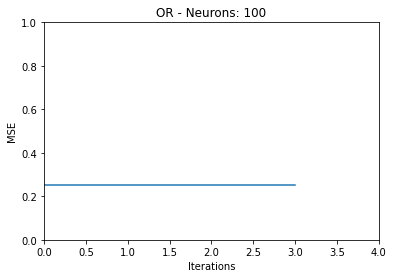

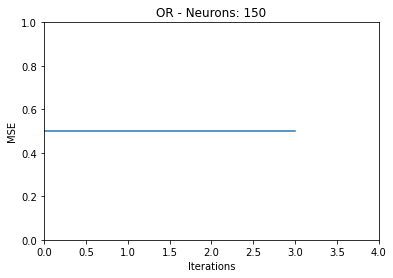

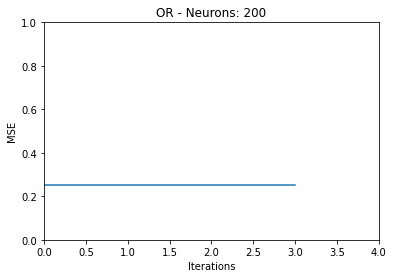

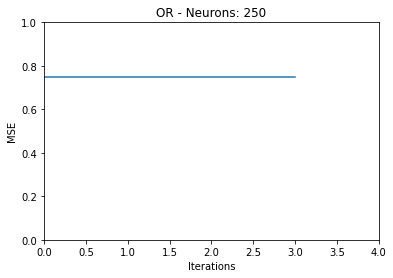

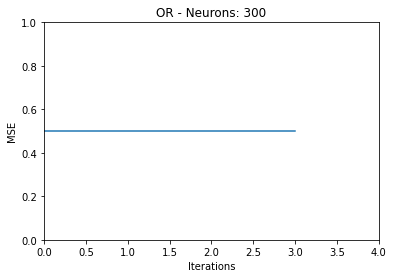

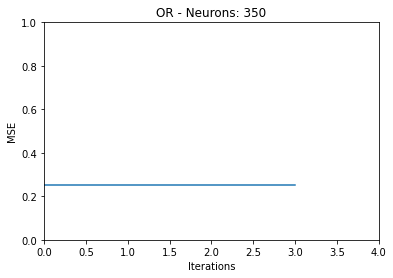

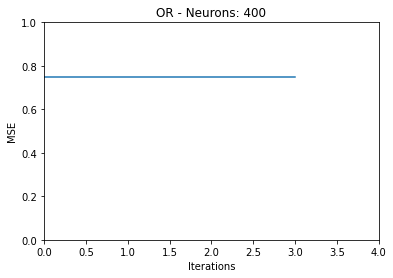

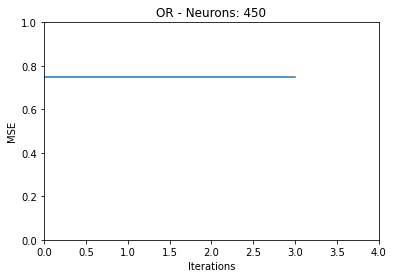

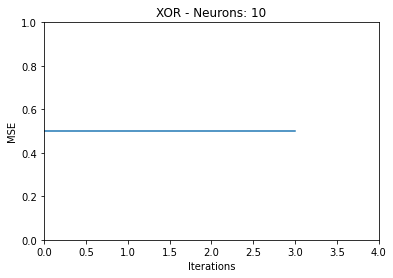

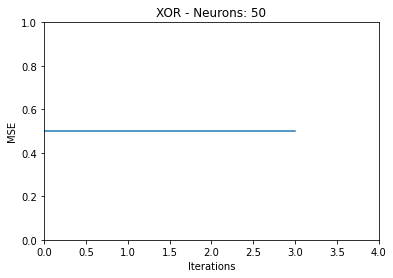

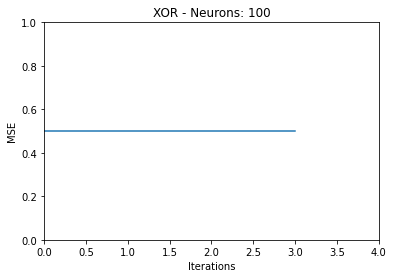

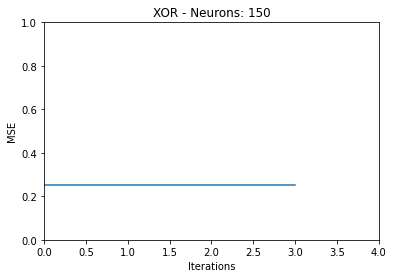

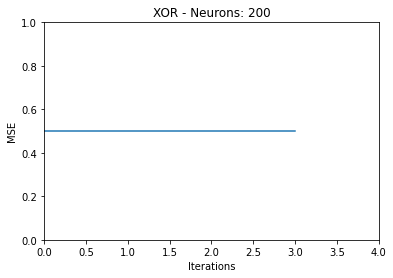

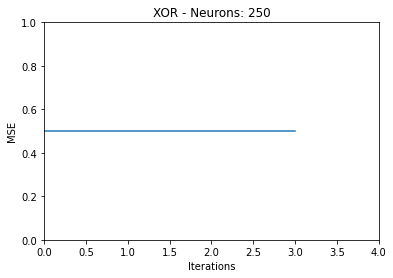

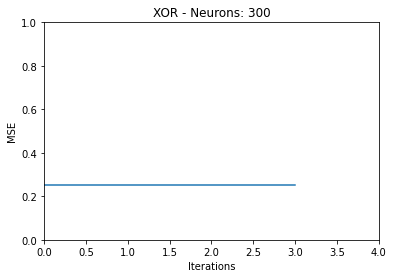

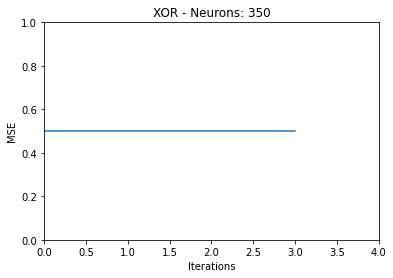

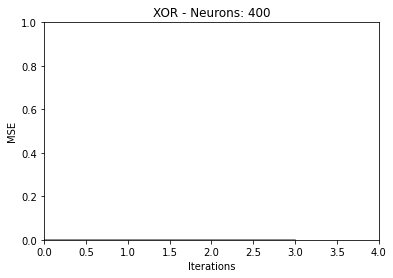

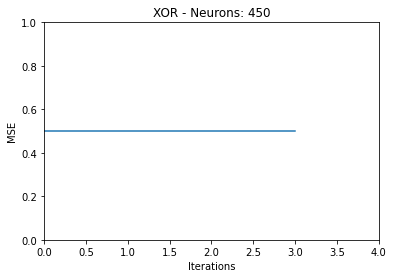

In [ ]:
neurons = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450]
scores = []



tipo = [[df_and, 'AND'], [df_or, 'OR'], [df_xor, 'XOR']]
for t in tipo:
  df = t[0]
  for n in neurons:
    cls = MLPClassifier(hidden_layer_sizes=(n,))
    model = cls.partial_fit( df[['x', 'y']].values, df[['target']].values, classes=[ 0, 1])
  
    for row in df_and.iterrows():
      predict = model.predict(df[['x', 'y']].values)
      mse = mean_squared_error(df[['target']].values, predict)
      scores.append(mse)
    print_mse(scores, n, t[1], 4)
    scores = []



## Conclusão
Devido a baixa quantidade de dados de treinamentos, e o fato da MLP treinar e classificar os mesmo quatro padrões, conforme o esperado, a rede apresentou um comportamento viciado, não sendo possível comparar o desempenho quanto alterado o número de neurónios na camada oculta. Ainda devido a quntidade de padrões insuficientes não se pode tirar nenhuma conclusão válida do experimento.

# Questão 2


 – Encontre no site UCI Machine Learning ( https://archive.ics.uci.edu/ml/index.php) as bases IRIS e WINE. Implemente a rede MLP com uma camada escondida, de modo que ela seja treinada pelo algoritmo gradiente descendente munido do backpropagation. Implemente também a validação cruzada tipo hold-out. Mostre um gráfico do erro (MSE) de treinamento e de validação para a melhor de 10 execuções completas, mostrando o ponto (em qual iteração) a validação apresentou menor erro. Faça um gráfico boxplot dos resultados de classificação em termos do MSE e apresente, para cada uma das 10 rodadas, a taxa percentual de acerto. Em cada caso, compare os resultados para números distintos de neurônios na camada intermediária. Use como função de ativação a tangente hiperbólica. Normalize sempre os dados no intervalo [-1;1], por meio da expressão abaixo:

## IRIS

In [ ]:
iris = load_iris()

X = iris['data']
y = iris['target']

X = pd.DataFrame(X, columns=['sepal lenhgt', 'sepal width', 'petal_lenght', 'petal_width'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), solver='sgd', activation='tanh')
model = mlp.fit(X_train, y_train)
model.score(X_test, y_test)

0.5

In [ ]:
scores = cross_val_score(model, X, y, cv=10)
scores

array([1.        , 0.93333333, 0.66666667, 0.33333333, 0.8       ,
       0.46666667, 0.73333333, 0.66666667, 1.        , 0.93333333])

In [ ]:
neurons = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450]
scores = []




for n in neurons:
  cls = MLPClassifier(hidden_layer_sizes=(n,), solver='sgd', activation='tanh')
  model = cls.fit(X_train, y_train)
  score = model.score(X_test, y_test)

  print(score)
  model = cls.partial_fit( X_test, y_test, classes= np.unique(y_test))



0.5
0.5
0.6666666666666666
0.6388888888888888
0.6388888888888888
0.6111111111111112
0.5
0.6111111111111112
0.6388888888888888
0.6111111111111112


## WINE

In [ ]:

wine = load_wine()

X = wine['data']
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

mlp = MLPClassifier(hidden_layer_sizes=(10,), solver='sgd', activation='tanh')
model = mlp.fit(X_train, y_train)
model.score(X_test, y_test)

0.5

In [ ]:

for n in neurons:
  cls = MLPClassifier(hidden_layer_sizes=(n,), solver='sgd', activation='tanh')
  model = cls.fit(X_train, y_train)
  score = model.score(X_test, y_test)

  print(score)
  model = cls.partial_fit( X_test, y_test, classes= np.unique(y_test))



0.5277777777777778
0.6944444444444444
0.2222222222222222
0.6666666666666666
0.6388888888888888
0.6388888888888888
0.6388888888888888
0.6666666666666666
0.6111111111111112
0.5555555555555556


In [ ]:
scores = cross_val_score(model, X, y, cv=10)
scores

array([0.38888889, 0.38888889, 0.66666667, 0.38888889, 0.38888889,
       0.72222222, 0.38888889, 0.66666667, 0.41176471, 0.47058824])